## Autors: Carlos Lozano Alemañy -  Arnau Vidal Moreno
# TITANIC - Machine Learning from Disaster

##### "Aplicar diferents classificadors (regressió logística, perceptró i arbres de decisió) a un problema real i analitzar les característiques del problema, estudiar i ajustar els paràmetres dels classificadors"

##### IMPORTAM LES LLIBRERIES

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### LLEGIM LES DADES

In [4]:
df = pd.read_csv("./dades.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## PART 1: - Neteja de Dades - Matriu de Correlació - Classificadors - Resultats

##### La primera part consistirà en netejar les dades del dataset per poder treballar amb elles.

## 1. La presència de NaNs

Primer miram quants de valos NaNs tenim en total a cada variable

In [6]:
def dadesPerdudes(data):
    total = data.isnull().sum().sort_values(ascending = False)
    ms=pd.concat([total], axis=1, keys=['Total'])
    ms= ms[ms["Total"] > 0]
    return ms

In [7]:
dadesPerdudes(df)

,Total
Cabin,687
Age,177
Embarked,2


Com hi ha molts de valors perduts a la variable Age (177), calcularem la mitjana de les edats i reemplaçarem els NaNs per aquest valor mitjà.

In [8]:
edad_M = (round(df['Age'].mean()))
df['Age'] = df['Age'].replace(np.nan, edad_M)

A la variable Embarked domes hi ha 2 valors NaNs, com son poques les files que els contenen seran directament eliminades.

In [9]:
df.dropna(subset = ['Embarked'], inplace=True)

A la variable "Cabin" eliminar les files amb NaNs no seria bona idea ja que en n'hi ha bastants, substituir aquests NaNs per una mesura d'agregació tampoc seria viable ja que no seria possible amb els valors dels tickets, per tant, la millor opció seria o be descartar aquesta variable o be utilitzar-la a fi de sebre si els passatgers tenien o no cabina, fora importar quina fos aquesta, i considerant els NaNs com a que no en tenien.

In [10]:
df["Cabin"] = df["Cabin"].notnull().astype("int")

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C


Comprovam que ja no queden NaNs al nostre DataSet

In [12]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## 2. Modificació de Dades

 {   female = 0 , male = 1  }

In [13]:
df['Sex'].replace(['female','male'],[0,1], inplace = True)


{ C = Cherbourg, Q = Queenstown, S = Southampton } ==  { C = 0, Q = 1, S = 2 }

In [14]:
df['Embarked'].replace(['Q','S','C'],[0,1,2], inplace = True)

Cream una nova variable que indicarà quan de familiars hi havia al titanic per cada individu

In [15]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.4500,0,1,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,2,1


## 3. Dades Categòriques

Categoritzarem aquestes dades per a tractar-les com a dades discretes.

Embarked

In [17]:
embark = df.pop("Embarked")
embark_sep = pd.get_dummies(embark, prefix='Embarked')
df = pd.concat([df.reset_index(drop=True), embark_sep.reset_index(drop=True)], axis=1, sort=False)

Pclass

In [18]:
clase = df.pop("Pclass")
clase_sep = pd.get_dummies(clase, prefix='Pclass')
df = pd.concat([df.reset_index(drop=True), clase_sep.reset_index(drop=True)], axis=1, sort=False)

Name , en funció dels diferents titols que tenen les persones

In [19]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for i in range(len(df)):
    df['Title'] = df['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
# Mr: homes adults
# Mrs: dones casades
# Master: nins
# Miss: dones joves o fora compromís
for i in range(len(df)):
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [20]:
title = df.pop("Title")
title_sep = pd.get_dummies(title, prefix='Title')
df = pd.concat([df.reset_index(drop=True), title_sep.reset_index(drop=True)], axis=1, sort=False)

In [21]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,...,1,0,0,0,1,0,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,...,0,1,1,0,0,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,...,1,0,0,0,1,0,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,...,1,0,1,0,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,...,1,0,0,0,1,0,0,1,0,0


## 4. Renou

La variable Ticket, PassengerId no aporten cap informació i es poden eliminar. Les variables SibSp i Parch es lleven ja que estan fusionades i ara correspon a FamilySize.

In [22]:
df.drop(['Ticket', 'Name', 'PassengerId', 'SibSp', 'Parch'],inplace = True, axis=1)

In [23]:
df

,Survived,Sex,Age,Fare,Cabin,FamilySize,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,1,22.0,7.2500,0,2,0,1,0,0,0,1,0,0,1,0,0
1,1,0,38.0,71.2833,1,2,0,0,1,1,0,0,0,0,0,1,0
2,1,0,26.0,7.9250,0,1,0,1,0,0,0,1,0,1,0,0,0
3,1,0,35.0,53.1000,1,2,0,1,0,1,0,0,0,0,0,1,0
4,0,1,35.0,8.0500,0,1,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,1,27.0,13.0000,0,1,0,1,0,0,1,0,0,0,0,0,1
885,1,0,19.0,30.0000,1,1,0,1,0,1,0,0,0,1,0,0,0
886,0,0,30.0,23.4500,0,4,0,1,0,0,0,1,0,1,0,0,0
887,1,1,26.0,30.0000,1,1,0,0,1,1,0,0,0,0,1,0,0


##### Una vegada tenim les dades netejades, cal fer una matriu de correlació per veure quines son les dades que estan més relacionades amb la supervivencia del passatger.

<function matplotlib.pyplot.show(close=None, block=None)>

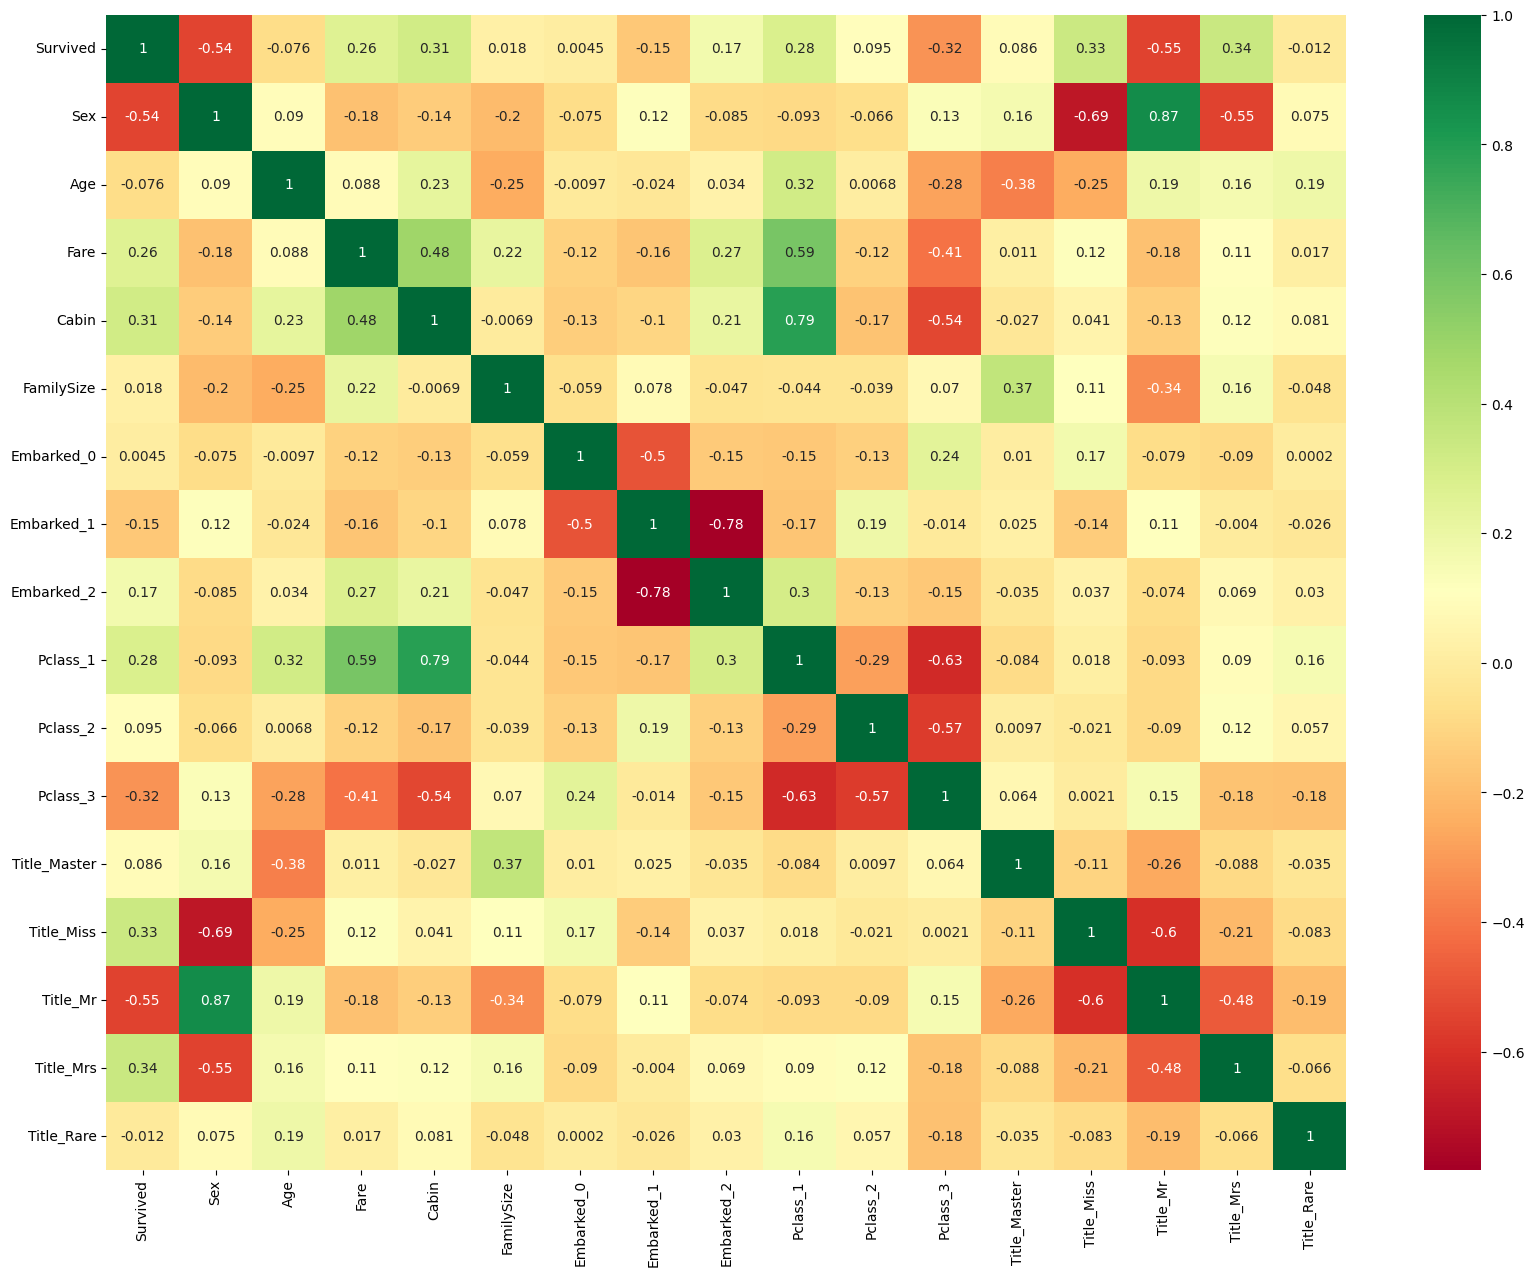

In [24]:
matriu_c = df.corr(method = 'pearson')
plt.figure(figsize=(20,15))
sns.heatmap(matriu_c, annot = True, cmap="RdYlGn")
plt.show

Com hem vist a la matriu, aparentment, els valors que tendran més influència per a que un individu sobrevisqui son el Sexe, (Alhora d'abandonar una navegació en cas d'emergència, les dones tenen prioritat davant dels homes), pel que es lògic pensar que el sexe pot influir bastant. Les altres característiques amb més correlació son degut al nivell de status social de cada passatger, (Es lògic pensar que aquells amb major status social i per tant, haguent pagat una major quantitat, tenguessin més probabilitats de sobreviure, a més gsiguent el primer trajecte del Titanic, presuntament, es molt probable que hi hagués gent de gran influencia, per tot això, si tenien cabina o no, si eren de classe alta o no, i si tenien un títols o un altre, eren factors relevants.

Per altra banda, variables amb molt poca correlació serien les diferents embarcacions, sobretot si es pujaren a Cherbourg (no s'ens ocurreix per quin motiu), el nombre de fasmiliars de cada passatger (es lògic pensar que seguint el protocol de supervivencia el nombre de familiars es poc influent) i altres com tittle-rare (que compren tots aquells que no tenien cap títol).

##### Ara modelam les dades i posteriorment aplicam els diferents classificadors per entrenar i obtenir els respectius resultats .

Primer definim quines dades seran d'entrenament i quines seran de test

In [94]:
traindf, testdf = train_test_split(df, test_size=0.3, random_state=42)

Ara dividim les dades d'entrenament del dataset en X (dades d'entrenament) i y (dades de prova) i les seves respectives variables

In [95]:
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature, test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((435, 16), (187, 16), (435,), (187,))

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## 1. PERCEPTRÓ

 Entrenament, Predicció i Performance

In [97]:
model = linear_model.Perceptron()
model.fit(X_train,y_train)
pred = model.predict(X_test)
result_perc = round(accuracy_score(pred,y_test)*100,2)
print(result_perc)


73.8


## 2. REGRESSIÓ LOGÍSTICA

 Entrenament, Predicció i Performance

In [98]:
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train,y_train)
pred = model.predict(X_test)
result_log = round(accuracy_score(pred,y_test)*100,2)
print(result_log)


85.03


# 3. RANDOM FOREST

## 3.1 Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

 Entrenament, Predicció i Performance

In [85]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
result_for = round(accuracy_score(pred,y_test)*100,2)
print(result_for)

80.21


## 3.1 Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

 Entrenament, Predicció i Performance

In [86]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
result_dec = round(accuracy_score(pred,y_test)*100,2)
print(result_dec)

74.33


##### Resultats obtinguts

In [87]:
models = pd.DataFrame({
    'Model': ['Perceptron', 'Regressio Logistica', 'Random Forest', 
                  'Decision Tree'],
    'Score': [result_perc.mean(), result_log.mean(), result_for.mean(), 
              result_dec.mean()]})
    
models.sort_values(by='Score',ascending=False)

,Model,Score
1,Regressio Logistica,85.03
2,Random Forest,80.21
3,Decision Tree,74.33
0,Perceptron,73.80


## PART 2: - Hiperparàmetres - Feature Importance

In [46]:
from sklearn.model_selection import GridSearchCV

##### Per a cada model es trobaran els millors paràmetres posibles amb la funció gridSearch(), s'entrenarà al model amb aquests, i es mostrarà els resultats obtinguts en comparació al primer entrenament.
##### Després es mostrarà un gràfic que representarà la importancia de cada característica en els respectius models.

## 1. PERCEPTRÓ

####  Seleccio Millors Paràmetres

In [118]:
grid = { "penalty": ["l2","l1","elasticnet"],
              "max_iter" : [10,15,20,30,40],
               "alpha": [0.00001, 0.001, 0.1]
              }
model = linear_model.Perceptron()
model_gs = GridSearchCV(model, param_grid = grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
model_gs.fit(X_train, y_train)
model_gs.best_estimator_


Fitting 5 folds for each of 45 candidates, totalling 225 fits


Perceptron(alpha=1e-05, max_iter=20, penalty='l1')

In [119]:
model = linear_model.Perceptron(alpha=1e-05, max_iter=20, penalty= 'l1')
model.fit(X_train,y_train)
pred = model.predict(X_test)
res_perc2 = round(accuracy_score(pred,y_test)*100,2)
print(res_perc2)

74.33


####  Feature Importance

<AxesSubplot:>

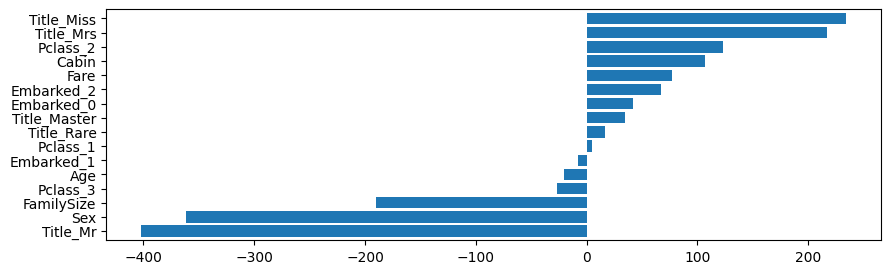

In [120]:
importance = model.coef_[0]
plt.figure(figsize=(10,3))
pd.Series(importance , X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)

## 2. REGRESSIÓ LOGÍSTICA

####  Seleccio Millors Paràmetres

In [174]:
grid = {"multi_class": ["auto","ovr","multinomial"],
             "solver":["lbfgs", "sag", "saga"],
        "max_iter":[500,550,600]
           }
model = linear_model.LogisticRegression()
model_gs = GridSearchCV(model, param_grid = grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
model_gs.fit(X_train, y_train)
model_gs.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits


LogisticRegression(max_iter=500)

In [175]:
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train,y_train)
pred = model.predict(X_test)
res_log2 = round(accuracy_score(pred,y_test)*100,2)
print(res_log2)

85.03


#### Feature Importance

<AxesSubplot:>

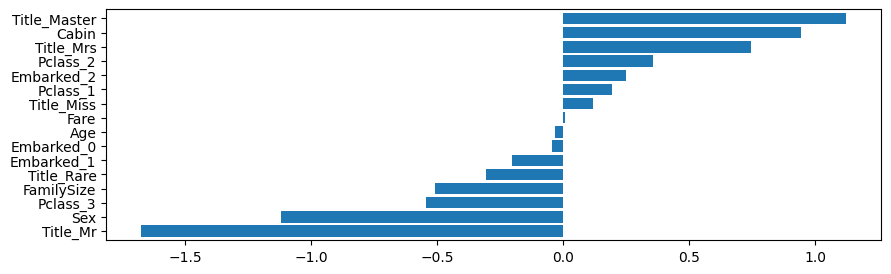

In [147]:
importance = model.coef_[0]
plt.figure(figsize=(10,3))
pd.Series(importance , X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)

## 3. RANDOM FOREST

####  Seleccio Millors Paràmetres

In [169]:
grid = {"criterion" : ["gini", "entropy", "log_loss"],
            "splitter": ["best", "random"]
           }
model = DecisionTreeClassifier()
model_gs = GridSearchCV(model, param_grid = grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
model_gs.fit(X_train, y_train)
model_gs.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits


DecisionTreeClassifier(criterion='entropy')

In [170]:
model = RandomForestClassifier( criterion='entropy')
model.fit(X_train,y_train)
pred = model.predict(X_test)
res_rf = round(accuracy_score(pred,y_test)*100,2)
print(res_rf)

82.35


####  Feature Importance

<AxesSubplot:>

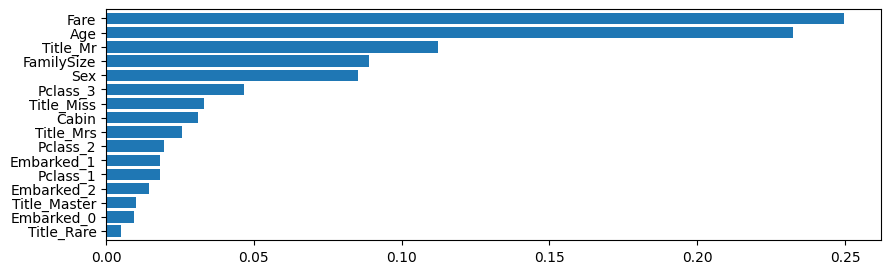

In [154]:
importance = model.feature_importances_
plt.figure(figsize=(10,3))
pd.Series(importance , X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)

## 3. DECISION TREE

##  Seleccio Millors Paràmetres

In [155]:
grid = {"criterion" : ["gini", "entropy", "log_loss"],
        "splitter":["best","random"]
           }
model = DecisionTreeClassifier(random_state=42)
model_gs = GridSearchCV(model, param_grid = grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
model_gs.fit(X_train, y_train)
model_gs.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [156]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train,y_train)
pred = model.predict(X_test)
res_dec2 = round(accuracy_score(pred,y_test)*100,2)
print(res_dec2)

75.94


##  Feature Importance

<AxesSubplot:>

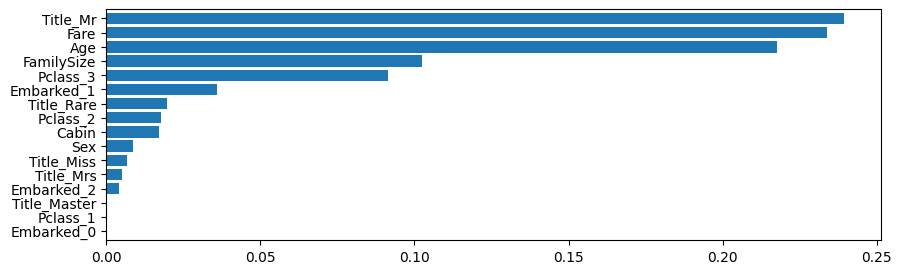

In [157]:
importance = model.feature_importances_
plt.figure(figsize=(10,3))
pd.Series(importance , X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)

##### Per acabar, comparam els resultats obtinguts abans i després d'utilitzar hiperparàmetres.

In [180]:
models = pd.DataFrame({
    'Model': ['Perceptron', 'Regressio Logistica', 'Random Forest', 
                  'Decision Tree'],
    'Score': [result_perc.mean(), result_log.mean(), result_for.mean(), 
              result_dec.mean()],
    'Score_Hiperparameter': [res_perc2.mean(), res_log2.mean(), res_rf.mean(), 
              res_dec2.mean()]})
    
models.sort_values(by='Score_Hiperparameter',ascending=False)

,Model,Score,Score_Hiperparameter
1,Regressio Logistica,85.03,85.03
2,Random Forest,80.21,82.35
3,Decision Tree,74.33,75.94
0,Perceptron,73.80,74.33


Com veim hi ha una petita millora a tots els models usant els millors paràmetres, menys a Regressio Logistica que es manté, això es deu a que al primer entrenament usam un max_iter = 500 perque si aquest es menor dona un error (el model diu que necesita més iteracions) i clar, quan feium hiperparàmetres resulta que el millor max_iter = 500 i els altres pareàmetres introduïts no afecten, per tant, l'explicació es aquesta.

# FI